<a href="https://colab.research.google.com/github/doramons/TILmon/blob/main/07_1_cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
label = ['비행기','자동차','새','고양이','사슴','개','개구리','말','배','트럭']
label_eng = ['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
import matplotlib.pyplot as plt
# 학습결과 그래프 함수
# loss 그래프
def plot_loss(history):
#     plt.figure(figsize=(10,7))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [ ]:
# accuracy 그래프
def plot_accuracy(history):
#     plt.figure(figsize=(10,7))
    plt.plot(history.history['accuracy'], label='Train accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

In [ ]:
len(label_eng)

10

In [ ]:
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
# 하이퍼파라미터 설정
LEARNING_RATE = 0.0005
N_EPOCHS = 30
N_BATCHS = 150
N_CLASS = 10
DROPOUT_RATE = 0.5

In [ ]:
# 데이터로딩
(train_image, train_label),(test_image, test_label) = keras.datasets.cifar10.load_data()

In [ ]:
train_image.shape, test_image.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]

In [ ]:
import numpy as np
np.unique(train_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [ ]:
train_label[0]

array([6], dtype=uint8)

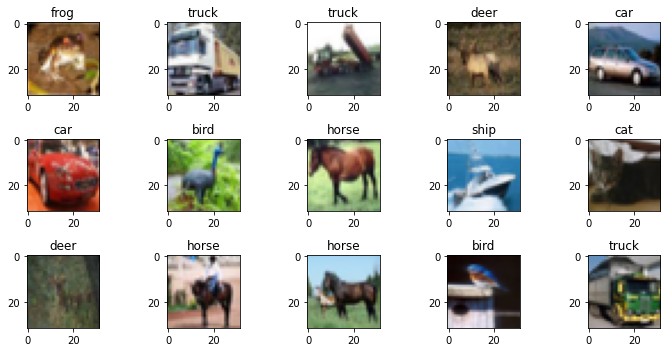

In [ ]:
# 15개 이미지 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(train_image[i])
  plt.title(label_eng[train_label[i][0]])
plt.tight_layout()
plt.show()

In [ ]:
X_train = train_image/255.
X_test = test_image/255.
y_train, y_test = train_label,test_label


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(N_TRAIN).batch(N_BATCHS,drop_remainder=True).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(N_BATCHS)

In [ ]:
def create_model():
  model = keras.Sequential()
  model.add(tf.keras.layers.Input((32,32,3)))
  model.add(tf.keras.layers.Conv2D(filters=32,
                                   kernel_size = (3,3),
                                   padding= 'same',
                                   strides = (1,1),
                                   activation ='relu'))
  model.add(tf.keras.layers.Dropout(0.15))

  model.add(tf.keras.layers.Conv2D(filters=32,
                                  kernel_size = (3,3),
                                  padding= 'same',
                                  strides = (1,1),
                                  activation ='relu'))
  
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),
                                      strides = (2,2),
                                      padding = 'same'))
  
  model.add(tf.keras.layers.Conv2D(filters = 64,
                                   kernel_size = 3,
                                   padding = 'same',
                                   strides = 1,
                                   activation = 'relu'))
  
  model.add(tf.keras.layers.Dropout(rate=0.15))

  model.add(tf.keras.layers.Conv2D(filters = 64,
                                   kernel_size = 3,
                                   padding = 'same',
                                   strides = 1,
                                   activation = 'relu'))

  model.add(tf.keras.layers.MaxPool2D(padding = 'same'))

  model.add(tf.keras.layers.Conv2D(filters = 128,
                                   kernel_size = 3,
                                   padding = 'same',
                                   strides = 1,
                                   activation = 'relu'))
  model.add(tf.keras.layers.Dropout(rate=0.15))

  model.add(tf.keras.layers.Conv2D(filters = 128,
                                   kernel_size = 3,
                                   padding = 'same',
                                   strides = 1,
                                   activation = 'relu'))
  
  model.add(tf.keras.layers.MaxPool2D(padding = 'same'))

  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dropout(rate=0.15))
  model.add(tf.keras.layers.Dense(1024, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.5))
  model.add(tf.keras.layers.Dense(512, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.3))
  
  model.add(tf.keras.layers.Dense(N_CLASS, activation='softmax'))

  return model



In [ ]:
model = create_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32, 32, 32)      

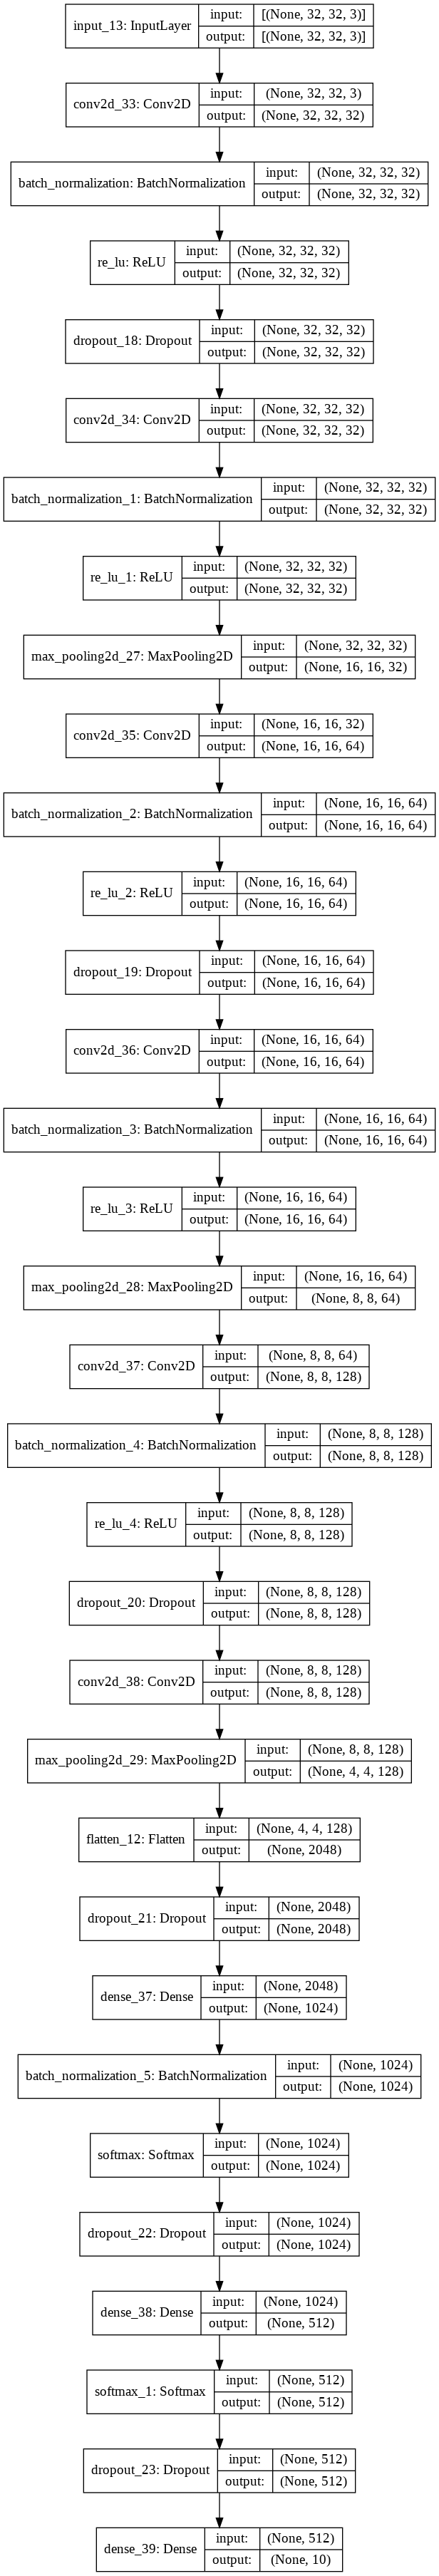

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
steps_per_epoch = N_TRAIN//N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

In [ ]:
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = test_dataset,
                    validation_steps = validation_steps)

Epoch 1/30
333/333 [==============================] - 7s 17ms/step - loss: 2.3026 - accuracy: 0.0970 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 2/30
333/333 [==============================] - 6s 16ms/step - loss: 2.3024 - accuracy: 0.1041 - val_loss: 2.3016 - val_accuracy: 0.1826
Epoch 3/30
333/333 [==============================] - 6s 16ms/step - loss: 2.3005 - accuracy: 0.1731 - val_loss: 2.2927 - val_accuracy: 0.2951
Epoch 4/30
333/333 [==============================] - 6s 16ms/step - loss: 2.2876 - accuracy: 0.2961 - val_loss: 2.2594 - val_accuracy: 0.3427
Epoch 5/30
333/333 [==============================] - 6s 16ms/step - loss: 2.2364 - accuracy: 0.3358 - val_loss: 2.1682 - val_accuracy: 0.3667
Epoch 6/30
333/333 [==============================] - 6s 16ms/step - loss: 2.1222 - accuracy: 0.3299 - val_loss: 2.0140 - val_accuracy: 0.3232
Epoch 7/30
333/333 [==============================] - 6s 16ms/step - loss: 1.9907 - accuracy: 0.3320 - val_loss: 1.8836 - val_accuracy: 0.3552

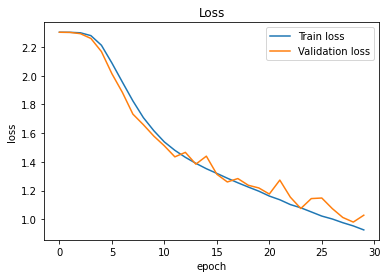

In [ ]:
plot_loss(history)

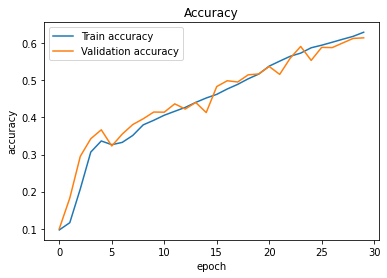

In [ ]:
plot_accuracy(history)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization


def create_model(): 
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.35))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.35))

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.35))

  model.add(Conv2D(256, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(Conv2D(256, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.35))

  
  model.add(Flatten())
  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  return model


In [ ]:
model = create_model()

In [ ]:
history = model.fit(train_dataset,
                    epochs = 100,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = test_dataset,
                    validation_steps = validation_steps)

Epoch 1/30
333/333 [==============================] - 8s 19ms/step - loss: 2.3447 - accuracy: 0.1861 - val_loss: 5.5095 - val_accuracy: 0.1038
Epoch 2/30
333/333 [==============================] - 6s 18ms/step - loss: 1.5207 - accuracy: 0.4331 - val_loss: 1.8643 - val_accuracy: 0.4300
Epoch 3/30
333/333 [==============================] - 6s 18ms/step - loss: 1.2436 - accuracy: 0.5629 - val_loss: 1.3937 - val_accuracy: 0.5351
Epoch 4/30
333/333 [==============================] - 6s 18ms/step - loss: 1.0816 - accuracy: 0.6256 - val_loss: 1.0384 - val_accuracy: 0.6398
Epoch 5/30
333/333 [==============================] - 6s 18ms/step - loss: 0.9777 - accuracy: 0.6671 - val_loss: 1.0772 - val_accuracy: 0.6322
Epoch 6/30
333/333 [==============================] - 6s 18ms/step - loss: 0.8940 - accuracy: 0.6958 - val_loss: 0.8545 - val_accuracy: 0.7107
Epoch 7/30
333/333 [==============================] - 6s 18ms/step - loss: 0.8135 - accuracy: 0.7262 - val_loss: 0.8107 - val_accuracy: 0.7230

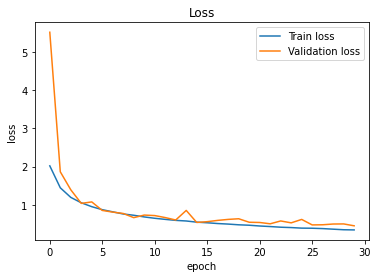

In [ ]:
plot_loss(history)

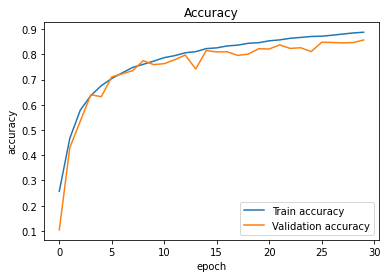

In [ ]:
plot_accuracy(history)

In [ ]:
model2.evaluate(test_dataset)

67/67 [==============================] - 1s 7ms/step - loss: 0.4529 - accuracy: 0.8570


[0.45292171835899353, 0.8569999933242798]